<div style="text-align: center; padding: 20px; border: 4px solid #4B0082; border-radius: 10px; background-color: #f7f7f7;">
    <h1 style="color: #4B0082; font-family: Arial, sans-serif;">Analyse des Accidents de la Route</h1>
    <p style="font-style: color: #333;">Une étude comparative entre plusieurs zones géographiques</p>
    <p style="font-style: italic; color: #333;">Siham HAMMOUCH</p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin: 20px 0;">
    <div style="margin-right: 200px;">
        <img src="image/voit-voit.jpeg" style="width: 200px; height: auto;">
    </div>
    <div style="margin-right: 200px;">
        <img src="image/route.jpeg" style="width: 200px; height: auto;">
    </div>
    <div>
        <img src="image/mot-voit.jpg" style="width: 200px; height: auto;">
    </div>
</div>

<div style="text-align: center; padding: 10px; border: 3px solid #4B0082; border-radius: 5px; background-color: #f9f9f9;">
    <h2 style="color: #4B0082; font-family: Arial, sans-serif;">Introduction</h2>
</div>

Les accidents de la route restent un enjeu majeur de santé publique et de sécurité, affectant quotidiennement des milliers de personnes à travers différentes échelles géographiques. Nous proposons une analyse approfondie des dynamiques des accidents de la route, en nous appuyant sur des données locales, nationales et internationales afin de comprendre les facteurs sous-jacents et de proposer des solutions adaptées.

L’approche repose sur une méthodologie rigoureuse appliquée à chaque base de données étudiée, incluant les étapes suivantes : récupération des données, nettoyage pour éliminer les anomalies, structuration pour une analyse optimale, modélisation des dynamiques, et interprétation des résultats. Pour ce faire, une variété d'outils analytiques et visuels a été utilisée pour traiter, visualiser et interpréter les données. Les bibliothèques Python telles que pandas et numpy ont permis de structurer et manipuler les données, tandis que matplotlib et seaborn ont été utilisés pour créer des visualisations significatives. folium a facilité la représentation géographique des données, permettant d'illustrer les tendances d'accidents à l'échelle locale, tandis que des outils de machine learning comme sklearn ont permis d'explorer les relations complexes entre les variables. Enfin, des techniques de nettoyage des données avec re ont permis d'assurer la qualité et la cohérence des informations.

Le modèle utilisé repose sur une analyse descriptive et exploratoire, visant à extraire des tendances significatives à partir des données tout en préparant le terrain pour d’éventuelles analyses prédictives ou explicatives. Ce modèle se concentre sur la structuration, la consolidation et l’analyse des informations clés pour permettre des comparaisons inter-zones et une compréhension approfondie des dynamiques accidentologiques.

L’étude est structurée en trois parties :

- Étude portant sur la ville de Rennes, axée sur la gravité des accidents, leur répartition géographique et leur évolution temporelle.
- Étude portant sur la ville de Paris, qui intègre des critères démographiques tels que l’âge et le genre, ainsi qu’une comparaison avec Rennes.
- Études nationales, en France et en Belgique, pour identifier les dynamiques globales et les particularités propres à chaque pays.

À travers cette analyse complète et méthodique, l’objectif est de dégager des tendances significatives, d’identifier les usagers les plus vulnérables et d’orienter les stratégies de sécurité routière vers une efficacité accrue.

<div style="text-align: center; padding: 10px; border: 3px solid #4B0082; border-radius: 5px; background-color: #f9f9f9;">
    <h2 style="color: #4B0082; font-family: Arial, sans-serif;">Partie 1 - Étude de Rennes</h2>
</div>

Les données de Rennes sont extraites de **accidents_corporels.csv**.

## Introduction

Cette première partie se consacre à l’analyse des accidents de la route dans la ville de Rennes, en s’appuyant sur des données détaillées. L’étude aborde trois axes principaux pour mieux comprendre les dynamiques locales :
- La gravité des accidents selon les usagers impliqués (piétons, cyclistes, motards).
- La répartition géographique des victimes, en distinguant les hospitalisés et les tués.
- L’évolution temporelle du nombre d’accidents, afin d’identifier les tendances au fil du temps.

Cette approche permettra de mettre en lumière les enjeux spécifiques à Rennes.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.neighbors import NearestNeighbors
import warnings; warnings.filterwarnings('ignore')
sb.set_style('ticks')
from IPython.display import display, HTML
import folium
import re

In [10]:
# Chargement des données
accidents_data = pd.read_csv("accidents_corporels.csv", sep=";")
# Suppression des colonnes inutiles
cols_to_drop = ['Geo Shape', 'gml_id', 'objectid', 'accident', 'unite_pv', 'heure', 
                'jsem', 'code_insee', 'inter', 'adresse', 'pr', 'nomv', 'numvro', 
                'pr_2', 'nomv_2', 'numvro_2', 'wms_time']
accidents_data = accidents_data.drop(columns=[col for col in cols_to_drop if col in accidents_data.columns], errors='ignore')
# Renommer les colonnes
accidents_data.rename(columns={
    'ntu': 'Tué',
    'nbh': 'Blessés hospitalisés',
    'nbnh': 'Blessés Légers'
}, inplace=True)
# Extraction des coordonnées géographiques
if 'Geo Point' in accidents_data.columns:
    accidents_data['Latitude'] = pd.to_numeric(accidents_data['Geo Point'].str.split(',', expand=True)[0], errors='coerce')
    accidents_data['Longitude'] = pd.to_numeric(accidents_data['Geo Point'].str.split(',', expand=True)[1], errors='coerce')

Dans cette étape, les données brutes de la base accidents_corporels.csv sont préparées pour l'analyse. Les colonnes inutiles ou non pertinentes ont été supprimées pour alléger le jeu de données. Les variables clés ont été renommées pour plus de clarté (ntu devient Tué). \
De plus, les coordonnées géographiques ont été extraites pour permettre une analyse spatiale des accidents. Cette étape assure que seules les informations essentielles et correctement formatées sont conservées.

## 1) Gravité de l'accident en fonction des acteurs 

Començons donc par l'étude de la gravité de l'acident en fonction des acteurs. 

### 1.1) Exposition des usagers (Piétons, Cyclistes et Motards)

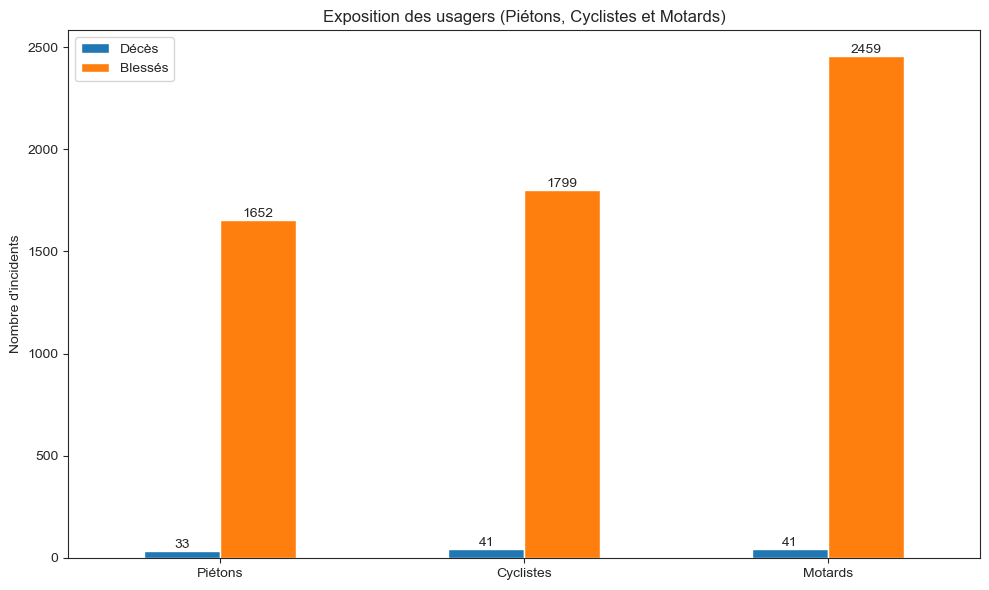

In [15]:
# Normaliser les colonnes pour piéton, vélo, moto
accidents_data['pieton'] = accidents_data['pieton'].str.strip().str.lower()
accidents_data['velo'] = accidents_data['velo'].str.strip().str.lower()
accidents_data['moto'] = accidents_data['moto'].str.strip().str.lower()
accidents_data['usager1'] = accidents_data['usager1'].str.strip().str.lower()

# Convertir les colonnes numériques et remplacer les valeurs non numériques par 0
for col in ['Tué', 'Blessés hospitalisés', 'Blessés Légers']:
    accidents_data[col] = pd.to_numeric(accidents_data[col], errors='coerce').fillna(0).astype(int)

# Filtrer les données pour piétons, cyclistes et motards
usager_exposition = {
    'Piétons': accidents_data[accidents_data['pieton'] == 'oui'],
    'Cyclistes': accidents_data[accidents_data['velo'] == 'oui'],
    'Motards': accidents_data[accidents_data['moto'] == 'oui']
}
# Calcul des taux de blessés et décès
exposition_stats = {}
for usager, data in usager_exposition.items():
    total_accidents = len(data)
    deces = data['Tué'].astype(int).sum()
    blesses = data[['Blessés hospitalisés', 'Blessés Légers']].astype(int).sum().sum()
    exposition_stats[usager] = {
        'Accidents': total_accidents,
        'Décès': deces,
        'Blessés': blesses,
    }

# Création d'un DataFrame pour visualiser les résultats
stats_df = pd.DataFrame.from_dict(exposition_stats, orient='index')

# Visualisation avec personnalisation
ax = stats_df[['Décès', 'Blessés']].plot(kind='bar', figsize=(10, 6), title="Exposition des usagers (Piétons, Cyclistes et Motards)")

# Ajouter les chiffres au-dessus des barres
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Le texte correspond à la hauteur de la barre
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position de l'annotation
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Personnalisation de l'axe des y et des x
mp.ylabel("Nombre d'incidents")
mp.xticks(rotation=0)
mp.tight_layout()
mp.show()

#### Analyse 

Ce graphique reflète l'exposition des usagers vulnérables (piétons, cyclistes et motards) en fonction du nombre de blessés et de décès des accidents recensés à Rennes.

Les motards présentent l'exposition la plus élevée, avec 2459 blessés et 41 décès, ce qui reflète bien leur vulnérabilité particulière en raison de l'absence de protection physique comparé aux voitures (exemple de l'habitacle de la voiture) alors qu'ils roulent sur les mêmes routes que ces dernières.

Les cyclistes suivent avec 1799 blessés et un nombre identique de 41 décès, soulignant également leur fragilité dans des environnements urbains car ils sont tout aussi vulnerables que les motards par l'absence de protection de leur locomotion mais ne sont pas autorisés à circuler sur les mêmes routes qu'eux contrairement aux motards.

Les piétons sont moins exposés en termes de blessures, avec 1652 blessés, et enregistrent un nombre de décès légèrement inférieur (33 décès) comparé aux deux autres groupes.

Ces chiffres révèlent une hiérarchisation de la gravité et du nombre d'accidents selon le type d'usager, mettant en évidence les risques accrus pour les motards et cyclistes. 

#### Transition 

Après avoir identifié l'exposition des différents usagers de la route aux accidents, il est essentiel d'analyser les conséquences spécifiques pour chacun, en termes de gravité et de types de blessures.

### 1.2) Conséquences des accidents par type d'usager

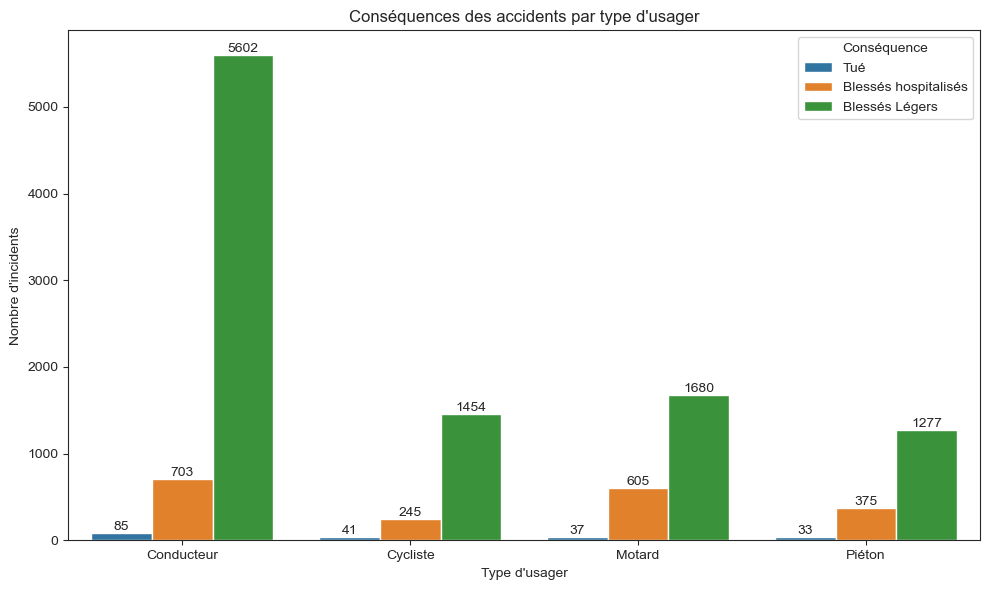

In [21]:
# Ajouter une colonne pour identifier les types d'usagers
accidents_data['Type_Usager'] = accidents_data.apply(
    lambda row: 'Piéton' if row['pieton'] == 'oui' else (
        'Cycliste' if row['velo'] == 'oui' else (
            'Motard' if row['moto'] == 'oui' else 'Conducteur')
    ), axis=1
)

# Calculer les statistiques des conséquences des accidents par type d'usager
consequence_stats = accidents_data.groupby('Type_Usager')[['Tué', 'Blessés hospitalisés', 'Blessés Légers']].sum()

# Préparation des données pour le graphique
consequence_stats_reset = consequence_stats.reset_index().melt(
    id_vars='Type_Usager', var_name='Conséquence', value_name='Nombre')

# Visualisation des conséquences des accidents par type d'usager avec chiffres
mp.figure(figsize=(10, 6))
ax = sb.barplot(data=consequence_stats_reset, 
                x='Type_Usager', y='Nombre', hue='Conséquence')

# Ajouter les annotations au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

mp.title("Conséquences des accidents par type d'usager")
mp.ylabel("Nombre d'incidents")
mp.xlabel("Type d'usager")
mp.legend(title="Conséquence")
mp.xticks(rotation=0)
mp.tight_layout()
mp.show()

#### Analyse

Dans la continuité de l’analyse précédente sur l’exposition des usagers vulnérables, ce graphique approfondit les conséquences des accidents en fonction du type d’usager (conducteurs, cyclistes, motards, piétons) et de leur gravité (tués, blessés hospitalisés, blessés légers).

Les conducteurs dominent largement en termes de blessés légers (plus de 5000 cas). Ce chiffre peut être corrélé à leur fréquence plus élevée sur les routes et à la protection qu’offre un habitacle, ce qui réduit la gravité des blessures comparé aux autres usagers.
Pour les motards, qui avaient déjà montré une exposition particulièrement élevée dans l’analyse précédente (1.1 - Exposition des usagers), on constate une proportion importante de blessés hospitalisés, confirmant leur vulnérabilité accrue en cas d’accident.
Les cyclistes, également identifiés comme un groupe fragile dans la section précédente, suivent un schéma similaire avec une forte proportion de blessures nécessitant une hospitalisation.
Les piétons, bien que moins exposés en termes de blessures dans 1.1, affichent ici un profil notable : leur proportion de blessés hospitalisés est comparable à celle des motards, ce qui souligne leur vulnérabilité.\
Enfin, le nombre de décès reste relativement faible pour chaque catégorie d’usager, mais il met une fois de plus en lumière la dangerosité accrue pour les motards et cyclistes, comme identifié dans la section précédente.

Ce graphique renforce les conclusions de 1.1 : la gravité des accidents est directement liée au niveau de protection physique des usagers. Les usagers non motorisés ou exposés (motards, cyclistes, piétons) restent les plus vulnérables, appelant à des actions ciblées, comme des infrastructures adaptées et une sensibilisation accrue à leur sécurité.

## 2) Répartition géographique

Passons maintenant à la répartition géographique des accidents

### 2.1) Zones géographiques rurales ou urbaines

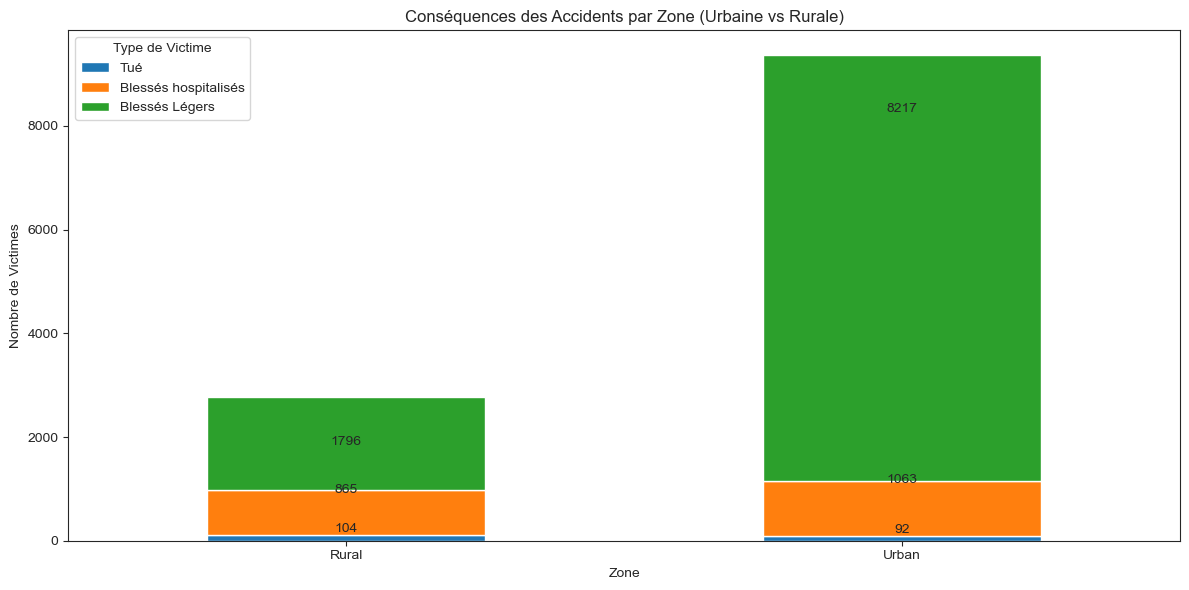

In [27]:
# Calcul de la densité locale pour chaque point
coordinates = accidents_data[['Latitude', 'Longitude']].dropna().to_numpy()
nbrs = NearestNeighbors(n_neighbors=15, algorithm='ball_tree').fit(coordinates)
distances, indices = nbrs.kneighbors(coordinates)

# Déterminer un seuil basé sur la densité locale
density_threshold = distances[:, 14].mean()  # Moyenne de la distance au 15e voisin
accidents_data['Local_Density'] = np.nan
accidents_data.loc[accidents_data[['Latitude', 'Longitude']].notna().all(axis=1), 'Local_Density'] = distances[:, 14]

# Classifier les zones en fonction de la densité locale
accidents_data['Urban_Rural'] = accidents_data['Local_Density'].apply(lambda x: 'Urban' if x <= density_threshold else 'Rural')

# Regroupement des données par zones et calcul des totaux
summary = accidents_data.groupby('Urban_Rural')[['Tué', 'Blessés hospitalisés', 'Blessés Légers']].agg({
    'Tué': 'sum',
    'Blessés hospitalisés': 'sum',
    'Blessés Légers': 'sum'
})

# Visualisation des résultats avec annotations
fig, ax = mp.subplots(figsize=(12, 6))
summary.plot(kind='bar', stacked=True, ax=ax)

# Ajouter des annotations pour chaque barre
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Texte à afficher
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position de l'annotation
        ha='center', 
        va='bottom',
        fontsize=10
    )

mp.title("Conséquences des Accidents par Zone (Urbaine vs Rurale)")
mp.ylabel("Nombre de Victimes")
mp.xlabel("Zone")
mp.xticks(rotation=0)
mp.legend(title="Type de Victime")
mp.tight_layout()
mp.show()

#### Analyse 

Ce graphique compare les conséquences des accidents dans les zones rurales et urbaines, en distinguant les types de victimes (tués, blessés hospitalisés, blessés légers).

Les zones urbaines concentrent une majorité des accidents. Ce constat reflète l’activité accrue en milieu urbain, avec une densité plus élevée de véhicules et d’usagers vulnérables comme les piétons et cyclistes.
En zones rurales, les chiffres sont significativement plus faibles en termes de blessés légers mais montrent une proportion plus élevée de blessés hospitalisés et de décès par rapport à leur volume global. Cela pourrait s’expliquer par des vitesses plus élevées et une intervention médicale souvent plus tardive en milieu rural.\
Cette analyse géographique s’inscrit dans la continuité des observations précédentes sur la gravité des accidents selon le type d’usager. En zones urbaines, les blessés légers dominent (conducteurs et cyclistes, comme vu en 1.2), tandis qu’en zones rurales, la gravité tend à augmenter pour les usagers impliqués (notamment les motards, déjà identifiés comme les plus exposés en 1.1).

#### Conclusion de la répartition graphique 

Ainsi, cette répartition met en lumière des besoins spécifiques d’intervention selon les zones : des mesures de prévention renforcées et des infrastructures adaptées en milieu rural pour réduire la gravité des accidents, et des politiques urbaines axées sur la protection des usagers vulnérables et la gestion du trafic.

#### Transition  

Après avoir comparé la répartition des accidents entre les zones rurales et urbaines, la représentation cartographique permet d’illustrer visuellement ces données et d’identifier les zones les plus touchées par les accidents à Rennes.

### 2.2) Représentation cartographique

In [35]:
# Convertir Longitude et Latitude en type float pour la manipulation géographique
accidents_data['Longitude'] = pd.to_numeric(accidents_data['Longitude'], errors='coerce')
accidents_data['Latitude'] = pd.to_numeric(accidents_data['Latitude'], errors='coerce')

# Supprimer les lignes où Longitude ou Latitude est NaN
accidents_data = accidents_data.dropna(subset=['Longitude', 'Latitude'])

# Filtrer pour conserver les accidents situés dans les limites approximatives de la Bretagne
bretagne_bounds = {
    'lat_min': 47.0,
    'lat_max': 49.0,
    'lon_min': -5.5,
    'lon_max': -1.0
}
accidents_bretagne = accidents_data[
    (accidents_data['Latitude'] >= bretagne_bounds['lat_min']) &
    (accidents_data['Latitude'] <= bretagne_bounds['lat_max']) &
    (accidents_data['Longitude'] >= bretagne_bounds['lon_min']) &
    (accidents_data['Longitude'] <= bretagne_bounds['lon_max'])
]

# Filtrer les accidents avec hospitalisés ou tués seulement
accidents_bretagne = accidents_bretagne[
    (accidents_bretagne['Blessés hospitalisés'] > 0) | (accidents_bretagne['Tué'] > 0)
]

# Création de la carte centrée sur la Bretagne
bretagne_map = folium.Map(location=[48.0, -2.5], zoom_start=8)

# Ajouter des marqueurs pour chaque accident dans les limites de la Bretagne
for _, row in accidents_bretagne.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"Tués: {row.get('Tué', 'N/A')}, "
            f"Blessés hospitalisés: {row.get('Blessés hospitalisés', 'N/A')}"
        ),
    ).add_to(bretagne_map)

# Sauvegarder la carte dans un fichier HTML
bretagne_map.save("carte_accidents_bretagne.html")
print("Carte enregistrée dans 'carte_accidents_bretagne.html'. Cliquez sur le bouton ci dessous pour l'afficher dans un second onglet :")
display(HTML(f'<a href="carte_accidents_bretagne.html" target="_blank"><button>Ouvrir la carte dans un nouvel onglet</button></a>'))

Carte enregistrée dans 'carte_accidents_bretagne.html'. Cliquez sur le bouton ci dessous pour l'afficher dans un second onglet :


À noter : Les cartes géographiques sont accessibles via les boutons ci-dessus. Ces cartes ont été générées pour visualiser les données géolocalisées et sont ouvertes séparément pour éviter de surcharger le notebook. Cela garantit une meilleure expérience utilisateur et un rendu optimal

#### Analyse

La carte illustre la répartition géographique des accidents sur la région étudiée, avec une concentration particulièrement marquée autour de l’agglomération Rennaise.

La densité élevée de points dans le centre-ville de Rennes confirme que les zones urbaines, déjà identifiées en 2.1, concentrent la majorité des accidents. Cela s’explique par une forte densité de trafic, une diversité d’usagers (piétons, cyclistes, conducteurs, motards) et une intensité accrue des interactions entre ces derniers.\
En revanche, les zones périphériques et rurales montrent une dispersion des accidents, ce qui corrobore les observations précédentes sur les zones rurales : un plus faible volume d’accidents mais des conséquences souvent plus graves, comme vu en 2.1.
Cette carte renforce l’importance d’une analyse spatiale des accidents. Elle montre où les efforts doivent être concentrés : des actions préventives et des infrastructures adaptées pour protéger les usagers vulnérables dans les zones urbaines, tout en abordant les spécificités des routes rurales (aménagements pour réduire la vitesse et améliorer l’intervention rapide).

## 3) Évolution temporelle

Pour finir notre étude sur la ville de Rennes, voyons maintenant l'évolution temporelle des accidents

### 3.1) De 2012 à 2023

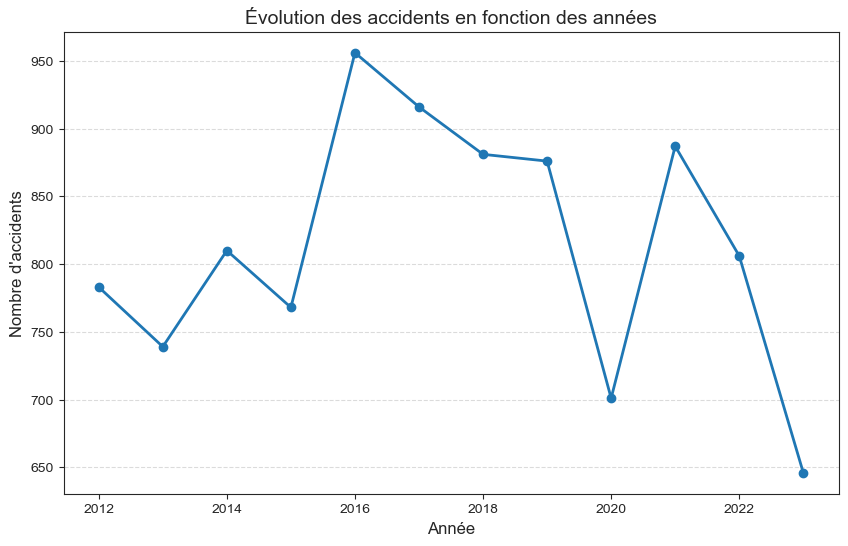

In [41]:
# Vérifier que la colonne 'date' existe
if 'date' in accidents_data.columns:
    # Convertir la colonne en datetime si ce n'est pas déjà fait
    accidents_data['date'] = pd.to_datetime(accidents_data['date'], errors='coerce')

    # Extraire l'année des dates
    accidents_data['année'] = accidents_data['date'].dt.year
else:
    raise KeyError("La colonne 'date' est absente du DataFrame.")

# Compter les accidents par année
accidents_par_annee = accidents_data['année'].value_counts().sort_index()

# Créer le graphique
mp.figure(figsize=(10, 6))
accidents_par_annee.plot(kind='line', marker='o', linestyle='-', linewidth=2)

# Ajouter des labels et un titre
mp.title("Évolution des accidents en fonction des années", fontsize=14)
mp.xlabel("Année", fontsize=12)
mp.ylabel("Nombre d'accidents", fontsize=12)
mp.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
mp.show()

#### Analyse

Le graphique montre l’évolution du nombre d’accidents à Rennes entre 2012 et 2023. On observe des fluctuations notables avec des tendances distinctes :

Une augmentation progressive du nombre d’accidents de 2013 à 2018, culminant à un pic en 2018 avec environ 950 accidents. Cela pourrait être lié à une intensification du trafic ou à une augmentation des déplacements urbains, comme en lien avec la concentration des accidents en zones urbaines observée en 2.2.\
Une baisse progressive après 2018, suivie d’une chute marquée en 2020, probablement en lien avec les restrictions de mobilité dues à la pandémie de COVID-19.\
Une reprise partielle en 2021, mais les chiffres tendent à redescendre jusqu’à 2023, indiquant possiblement l’effet durable de changements dans les habitudes de déplacement, comme une adoption accrue des mobilités douces (vélos, trottinettes).
En comparant avec les sections précédentes (1.1 et 1.2), cette évolution temporelle reflète également une transition dans le profil des usagers vulnérables et la gravité des accidents. Par exemple, l’adoption croissante de moyens de transport alternatifs pourrait avoir contribué à modifier la nature des accidents en milieu urbain.

#### Transition 

Après avoir analysé les tendances générales de l'évolution des accidents sur plus d'une décennie, il est pertinent d'examiner en détail les variations mensuelles sur une année spécifique pour mieux comprendre les dynamiques saisonnières et les périodes critiques.

### 3.2) Évolution sur un an

#### 3.2.1) 2023

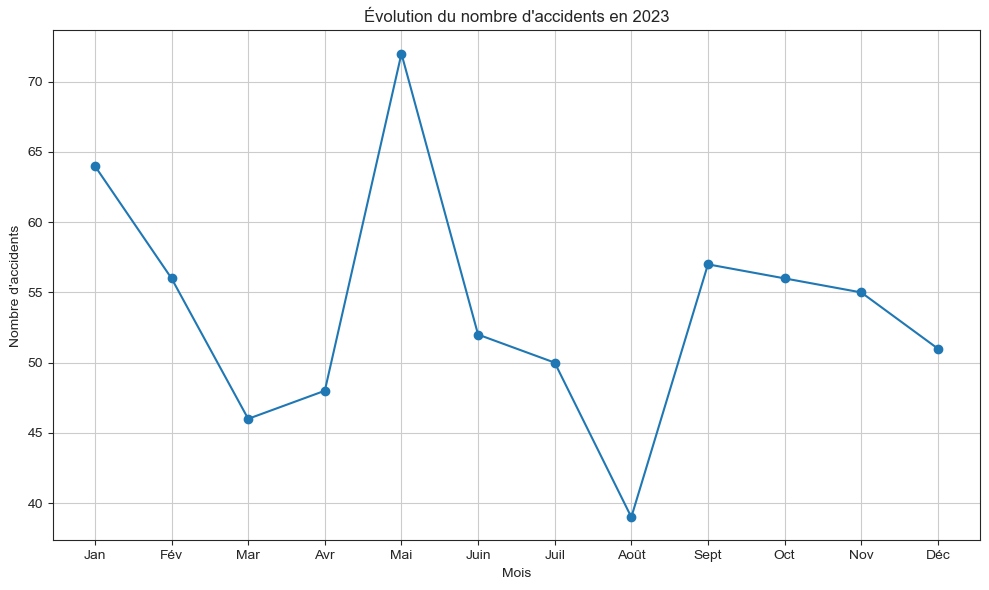

In [48]:
# Convertir la colonne 'date' au format datetime sans la réduire à .dt.date
accidents_data['date'] = pd.to_datetime(accidents_data['date'], errors='coerce')

# Filtrer les données pour l'année 2023
accidents_2023 = accidents_data[accidents_data['date'].dt.year == 2023]

# Extraire le mois de chaque accident
accidents_2023['mois'] = accidents_2023['date'].dt.month

# Compter le nombre d'accidents par mois
accidents_per_month = accidents_2023.groupby('mois').size()

# Visualisation
ax = accidents_per_month.plot(kind='line', marker='o', figsize=(10, 6), title="Évolution du nombre d'accidents en 2023")
mp.ylabel("Nombre d'accidents")
mp.xlabel("Mois")
mp.xticks(ticks=range(1, 13), labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sept", "Oct", "Nov", "Déc"])
mp.grid(True)
mp.tight_layout()
mp.show()

##### Analyse

Le nombre d’accidents culmine en juin, avec plus de 90 accidents, reflétant une augmentation probable de la circulation liée à la saison estivale et à une reprise après les restrictions sanitaires des années précédentes.
Un creux significatif est observé en juillet, suivi d’une remontée en septembre, qui coïncide généralement avec la rentrée scolaire et une intensification des trajets urbains.\
Les mois d’hiver (décembre notamment) enregistrent un net recul des accidents, probablement dû à une diminution des déplacements.

#### 3.2.2) 2022

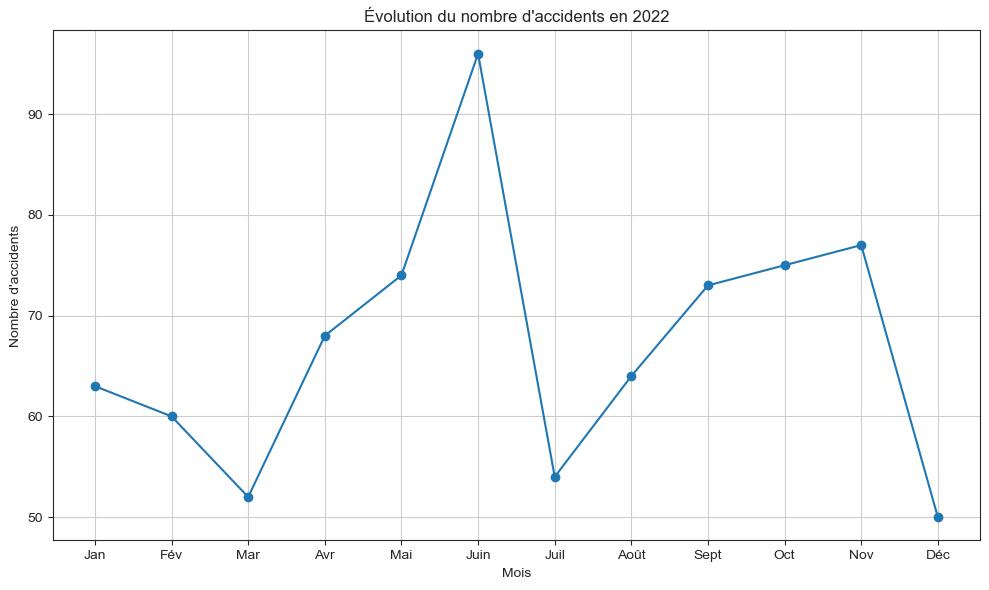

In [52]:
# Filtrer les données pour l'année 2022
accidents_2022 = accidents_data[accidents_data['date'].dt.year == 2022]

# Extraire le mois de chaque accident
accidents_2022['mois'] = accidents_2022['date'].dt.month

# Compter le nombre d'accidents par mois
accidents_per_month1 = accidents_2022.groupby('mois').size()

# Visualisation
ax = accidents_per_month1.plot(kind='line', marker='o', figsize=(10, 6), title="Évolution du nombre d'accidents en 2022")
mp.ylabel("Nombre d'accidents")
mp.xlabel("Mois")
mp.xticks(ticks=range(1, 13), labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sept", "Oct", "Nov", "Déc"])
mp.grid(True)
mp.tight_layout()
mp.show()


##### Analyse 

Le nombre d’accidents reste ici plus constant tout au long de l’année, avec des variations moins marquées que pour 2022. Le pic est observé en mai avec environ 70 accidents, mais la baisse estivale reste notable en août, comme en 2022.
Cette relative stabilité pourrait refléter des mesures de prévention plus efficaces ou des changements dans les comportements de mobilité.

Les variations mensuelles confirment l’importance de la saisonnalité dans les déplacements, avec des mois estivaux à risque pour certains usagers vulnérables.
La reprise automnale en septembre est cohérente avec la concentration des accidents en zones urbaines (section 2.2), où le trafic augmente lors de la rentrée.
La baisse hivernale met en lumière une diminution des déplacements, ce qui pourrait également expliquer les variations observées dans la tendance de long terme en 3.1.
Ces analyses sur un an renforcent la nécessité d’adapter les campagnes de prévention aux périodes de risque accru, comme les mois de mai-juin et septembre. Des efforts ciblés sur ces périodes pourraient contribuer à limiter le nombre d’accidents, en particulier pour les usagers vulnérables en milieu urbain.

## Conclusion

Ainsi, l’analyse des accidents de la route à Rennes a permis de mettre en évidence plusieurs dynamiques importantes :\
Les usagers vulnérables, tels que les piétons, cyclistes et motards, se révèlent particulièrement exposés, avec des conséquences souvent graves. \
La répartition géographique a montré une concentration des accidents dans les zones urbaines denses, tandis que l’évolution temporelle a souligné l’influence des périodes de l’année sur le nombre d’accidents, notamment les pics liés à la saison estivale et à la rentrée.

Ces observations soulignent l’importance d’une approche ciblée pour améliorer la sécurité routière à Rennes. Cela inclut le renforcement des infrastructures dans les zones à risque, des campagnes de sensibilisation adaptées aux usagers vulnérables, et une attention particulière aux périodes critiques identifiées. Ces efforts combinés pourraient contribuer à réduire le nombre d’accidents et leur gravité, tout en rendant les déplacements plus sûrs pour tous.

<div style="text-align: center; padding: 10px; border: 3px solid #4B0082; border-radius: 5px; background-color: #f9f9f9;">
    <h2 style="color: #4B0082; font-family: Arial, sans-serif;">Partie 2- Étude de Paris</h2>
</div>


Les données pour Paris proviennent de **accidentologie0.csv**.

## Introduction

Dans cette section, nous nous intéressons à l'analyse des accidents de la route à Paris, en explorant des critères spécifiques tels que l'âge et le genre des victimes. Cette approche détaillée permettra de mieux comprendre les dynamiques propres à la capitale.

L’étude se structure autour de trois axes principaux :
- Analyse de la corrélation entre l'âge, la gravité des accidents et le nombre total d'accidents.
- Répartition géographique des accidents dans Paris.
- Évolution temporelle des accidents, en distinguant les tendances selon le genre.

Ces analyses visent à identifier les spécificités parisiennes en matière de sécurité routière.

In [61]:
mps = pd.read_csv("accidentologie0.csv", sep=";")
if 'PV' in mps.columns:
    mps = mps.drop(columns=['PV'])
if 'Arrondissement' in mps.columns:
    mps = mps.drop(columns=['Arrondissement'])
if 'Millieu' in mps.columns:
    mps = mps.drop(columns=['Millieu'])
#if 'Adresse' in mps.columns:
    #mps = mps.drop(columns=['Adresse'])
#if 'Longitude' in mps.columns:
    #mps = mps.drop(columns=['Longitude'])
#if 'Latitude' in mps.columns:
    #mps = mps.drop(columns=['Latitude'])
if 'Id accident' in mps.columns:
    mps = mps.drop(columns=['Id accident'])
if 'PIM/BD PERIPHERIQUE' in mps.columns:
    mps = mps.drop(columns=['PIM/BD PERIPHERIQUE'])
if 'Blessés Légers' in mps.columns:
    mps = mps.drop(columns=['Blessés Légers'])
if 'Blessés hospitalisés' in mps.columns:
    mps = mps.drop(columns=['Blessés hospitalisés'])
if 'Tué' in mps.columns:
    mps = mps.drop(columns=['Tué'])
if 'Résumé' in mps.columns:
    mps = mps.drop(columns=['Résumé'])
if 'Coordonnées' in mps.columns:
    mps = mps.drop(columns=['Coordonnées'])
if 'arrondgeo' in mps.columns:
    mps = mps.drop(columns=['arrondgeo'])
if 'arronco' in mps.columns:
    mps = mps.drop(columns=['arronco'])
if 'Coordonnées.1' in mps.columns:
    mps = mps.drop(columns=['Coordonnées.1'])
if 'Arrondissement.1' in mps.columns:
    mps = mps.drop(columns=['Arrondissement.1'])
if 'Nom arrondissement.1' in mps.columns:
    mps = mps.drop(columns=['Nom arrondissement.1'])
mps['Blessés_Légers'] = (
    mps['Gravité'] == 'Blessé_léger').astype(int)
mps['Blessés_hospitalisés'] = (
    mps['Gravité'] == 'Blessé_hospitalisé').astype(int)
mps['Tué'] = (
    mps['Gravité'] == 'Tué').astype(int)
categorical_columns = ['Age']
mps[categorical_columns] = mps[categorical_columns].fillna('Unknown')
mps['Date'] = pd.to_datetime(mps['Date'], errors='coerce')
mps['Year'] = mps['Date'].dt.year
mps['Month'] = mps['Date'].dt.month
categorical_columns_to_encode = ['Mode', 'Catégorie', 'Gravité', 'Genre', 'Milieu']
mps= pd.get_dummies(mps,columns=categorical_columns_to_encode)

Cette étape prépare les données issues de accidentologie0.csv pour l'analyse. Les colonnes non pertinentes ou redondantes ont été supprimées pour alléger la dataset. \
Les données catégorielles manquantes ont été remplacées par une valeur par défaut (Unknown). Les dates ont été standardisées et enrichies avec des variables dérivées telles que l'année et le mois. \
Enfin, des colonnes spécifiques ont été converties en indicateurs numériques pour chaque type de gravité (e.g., Blessés_Légers, Tué), et des variables catégorielles clés ont été encodées en variables indicatrices (dummies). Cette étape assure un format cohérent et prêt pour les analyses ultérieures.

## 1) Analyse de la corrélation entre l'âge, la gravité des accidents et le nombre total d'accidents

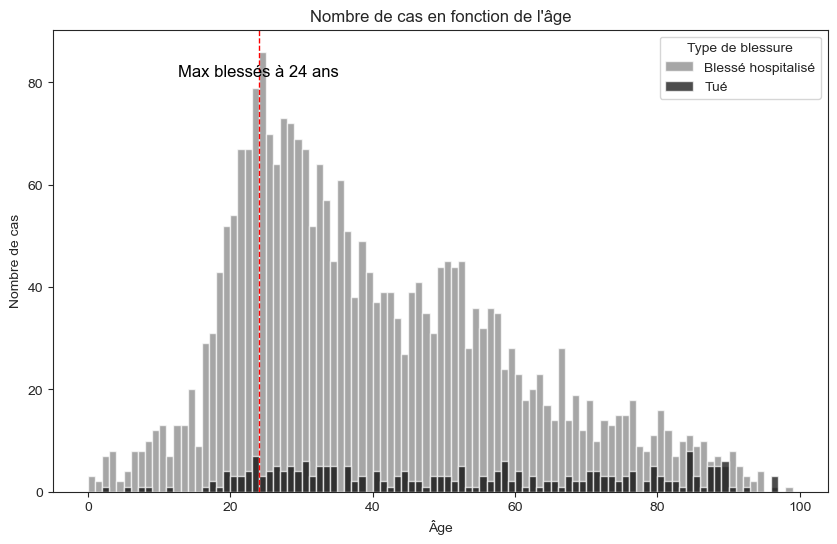

In [64]:
df_melted = mps.melt(id_vars=['Age'], value_vars=['Gravité_Blessé hospitalisé', 'Gravité_Tué'], 
                    var_name='Statut', value_name='Présence')

# Filtrer uniquement les cas True
df_filtered = df_melted[df_melted['Présence']]

# Calcul de l'âge au maximum des blessés
max_age = df_filtered['Age'].value_counts().idxmax()

# Conversion des âges en entiers pour éviter l'erreur
df_filtered['Age'] = df_filtered['Age'].astype(int)
max_age = int(max_age)

# Création de la visualisation
mp.figure(figsize=(10, 6))

# Tracer le graphique avec une boucle pour contrôler manuellement les couleurs et les étiquettes
palette = {'Gravité_Blessé hospitalisé': 'grey','Gravité_Tué': 'black'}
for statut, couleur in palette.items():
    subset = df_filtered[df_filtered['Statut'] == statut]
    mp.hist(subset['Age'], bins=range(min(df_filtered['Age']), max(df_filtered['Age']) + 2),
            color=couleur, label=statut.replace("Gravité_", ""), alpha=0.7)

# Ajouter une annotation pour l'âge au maximum des blessés
mp.axvline(max_age, color='red', linestyle='--', linewidth=1)
mp.text(max_age, mp.gca().get_ylim()[1] * 0.9, f"Max blessés à {max_age} ans",
        color='black', ha='center', fontsize=12)

# Ajouter des titres et une légende explicite
mp.title('Nombre de cas en fonction de l\'âge')
mp.xlabel('Âge')
mp.ylabel('Nombre de cas')
mp.legend(title='Type de blessure')

mp.show()

#### Analyse

Le graphique illustre la répartition des accidents en fonction de l’âge des victimes et distingue deux types de gravité : blessés hospitalisés et tués.\
Le maximum des blessés hospitalisés est observé autour de 24 ans, ce qui correspond à une tranche d’âge où les individus sont particulièrement actifs sur la route (jeunes conducteurs, cyclistes ou usagers de deux-roues motorisés).
Cette concentration des accidents à cet âge reflète possiblement un mélange de comportements à risque (excès de vitesse, usage des deux-roues) et d’inexpérience.\
Une décroissance progressive est observée après 24 ans, mais le nombre de cas reste significatif jusqu’à environ 60 ans.
Les accidents impliquant les personnes âgées (65 ans et plus), bien que moins nombreux, montrent un risque accru de décès notamment en raison de leur fragilité physique et de mauvais reflexes pour certains.

Le nombre de décès est relativement constant et faible comparé aux blessés hospitalisés, mais il est notable que la répartition couvre une large plage d’âges, reflétant que la mortalité peut survenir dans divers contextes.

Ce focus sur les jeunes adultes confirme une tendance déjà identifiée dans la partie sur Rennes (1.1 - Exposition des usagers), où les motards et cyclistes, souvent plus jeunes, étaient parmi les plus touchés.

Cette analyse met en évidence un enjeu majeur :
Renforcer l’éducation routière et les campagnes de prévention ciblant les jeunes usagers et les plus agés pour limiter les comportements à risque.

#### Transtion

Après avoir exploré l'impact de l'âge sur la gravité et le nombre total d'accidents, il est essentiel d'examiner comment ces accidents se répartissent géographiquement dans Paris, en se concentrant sur les zones où les conséquences sont les plus graves.

## 2) Répartiton géographique (sans les blessés légers)

In [70]:
# Créer la carte centrée sur Paris avec OpenStreetMap comme fournisseur explicite
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12, tiles="OpenStreetMap")

# Filtrer les données pour inclure seulement les accidents graves (blessés hospitalisés ou tués)
df_filtered = mps[(mps['Gravité_Blessé hospitalisé'] == True) | (mps['Gravité_Tué'] == True)]

# Ajouter les points d'accidents pour les blessés hospitalisés et tués
for _, row in df_filtered.dropna(subset=['Latitude', 'Longitude']).iterrows():
    # Assurez-vous que les colonnes utilisées dans 'popup' existent dans votre DataFrame
    tués = row.get('Tué', 'N/A')  # Remplacez 'Tué' par le nom exact de la colonne si différent
    blessés_hospitalisés = row.get('Blessés_hospitalisés', 'N/A')  # Vérifiez également ce nom
    
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=3,
        color='red',  # Vous pouvez personnaliser la couleur ici
        fill=True,
        fill_opacity=0.7,
        popup=(
            f"Tués: {tués}, "
            f"Blessés hospitalisés: {blessés_hospitalisés}"
        )
    ).add_to(m)

# Enregistrer la carte
m.save("Paris_carte.html")
print("Carte enregistrée sous 'Paris_carte.html'. Cliquez sur le bouton ci dessous pour l'afficher dans un second onglet :")
display(HTML(f'<a href="Paris_carte.html" target="_blank"><button>Ouvrir la carte dans un nouvel onglet</button></a>'))


Carte enregistrée sous 'Paris_carte.html'. Cliquez sur le bouton ci dessous pour l'afficher dans un second onglet :


#### Analyse

La carte représente une concentration dense d’accidents au cœur de Paris, avec une distribution qui s’étend sur l’ensemble de la ville et des axes périphériques.

La majorité des points se concentre dans les arrondissements centraux de Paris, en cohérence avec la forte densité de population et de trafic dans ces zones.
Cette concentration reflète une intensité élevée des interactions entre les différents usagers de la route (piétons, cyclistes, conducteurs, etc.).

Les zones périphériques, notamment autour du périphérique parisien, montrent également une accumulation notable d’accidents. Cela peut s’expliquer par des vitesses plus élevées et une fréquence importante de déplacements motorisés.

Les accidents dans les espaces verts (Bois de Boulogne et Bois de Vincennes) restent présents mais relativement moins nombreux, ce qui suggère que ces espaces sont moins exposés à des flux importants de trafic.

En lien avec la cartographie observée pour Rennes en 2.2, la répartition géographique montre des similitudes. Dans les deux cas, les zones à forte densité urbaine concentrent l’essentiel des accidents. Cependant, Paris, en raison de sa taille et de son activité intense, présente une dispersion beaucoup plus dense, notamment autour des axes principaux.

Cette répartition géographique confirme une fois encore l’importance de cibler les zones denses en interactions routières pour réduire les accidents. Les grands boulevards, intersections majeures et périphéries nécessitent des infrastructures de sécurité renforcées, adaptées à l’intensité des déplacements dans une métropole aussi dynamique que Paris.

#### Transition

Après avoir identifié les zones géographiques les plus touchées par les accidents graves, il est pertinent d’analyser leur évolution dans le temps, en tenant compte des différences selon le genre des victimes pour affiner la compréhension des dynamiques parisiennes.

## 3) Évolution temporelle (avec distinction de genre)

### Introduction

Dans cette section, nous examinerons l'évolution des accidents à Paris en adoptant une perspective temporelle et genrée. L’analyse sera structurée en trois sous-sections :
- Évolution temporelle des accidents en fonction des années et du genre, pour comprendre les grandes tendances sur plusieurs années.
- Accidents sur l'année 2022, afin d’identifier les variations saisonnières.
- Comparaison de l'évolution temporelle de Paris et Rennes, pour mettre en lumière les similitudes et différences entre ces deux villes.

### 3.1)  Évolution temporelle des accidents en fonction des années et du genre

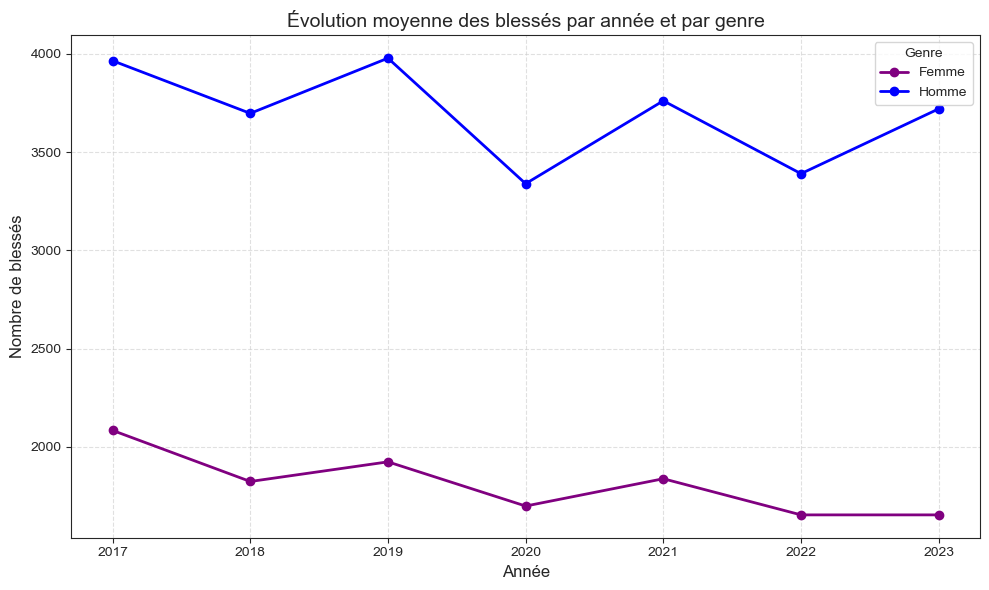

In [79]:
mps['Date'] = pd.to_datetime(mps['Date'])
mps['année'] = mps['Date'].dt.year

# Compter les blessés par date et par genre
df_counts = mps.melt(id_vars=['année'], value_vars=['Genre_Feminin', 'Genre_Masculin'], 
                    var_name='Genre', value_name='Présence')
df_counts = df_counts[df_counts['Présence']].groupby(['année', 'Genre']).size().unstack(fill_value=0)

# Tracer le graphique avec deux lignes pour les genres
mp.figure(figsize=(10, 6))
mp.plot(df_counts.index, df_counts['Genre_Feminin'], label='Femme', color='purple', marker='o', linewidth=2)
mp.plot(df_counts.index, df_counts['Genre_Masculin'], label='Homme', color='blue', marker='o', linewidth=2)

# Ajouter des titres et des légendes
mp.title('Évolution moyenne des blessés par année et par genre', fontsize=14)
mp.xlabel('Année', fontsize=12)
mp.ylabel('Nombre de blessés', fontsize=12)
mp.legend(title='Genre', fontsize=10)
mp.grid(True, linestyle='--', alpha=0.6)
mp.xticks(df_counts.index)  # Afficher uniquement les années présentes
mp.tight_layout()

mp.show()

### Analyse
<a id="retour1"></a>

Ce graphique reflète les évolutions moyennes du nombre de blessés par année, différenciées entre les hommes et les femmes sur la période étudiée.

Le nombre de blessés masculins est systématiquement plus élevé, oscillant entre 3500 et 4000 cas par an.
Une légère diminution est observée en 2020, année marquée par des restrictions de mobilité dues à la pandémie, suivie d’une reprise progressive.

Les femmes présentent un nombre de blessés bien inférieur, autour de 2000 cas en moyenne, avec une diminution plus marquée en 2022 et 2023.
Cette différence pourrait s’expliquer par des comportements de mobilité plus prudents.

La distance constante entre les deux courbes illustre une différence de comportement ou d’exposition au risque entre les genres.
Cela reflète des tendances sociétales souvent observées dans la mobilité urbaine comme le démontre plusieurs études cf [bibliographie](#bibliographie): les hommes sont plus susceptibles d'adopter des comportements à risques. Mais également de conduire ou d’utiliser des véhicules à risque, tandis que les femmes adoptent génralement des modes de déplacement jugés plus sûrs.

Ces données mettent en évidence l’importance de cibler les hommes succeptibles d'adopter des comportements à risques ou d'utiliser des mobilités pluis risuqées dans les campagnes de prévention routière, en tenant compte de leur exposition accrue et des comportements à risque associés. Dans le même temps, il est essentiel de poursuivre les efforts pour sécuriser les déplacements des femmes, notamment dans les espaces urbains où elles peuvent être plus vulnérables à d'autres formes de danger.

#### Transition

Après avoir étudié les tendances sur plusieurs années et selon le genre, il est important de se concentrer sur les variations saisonnières à travers une analyse détaillée de l'année 2022.

### 3.2) Accidents en fonction de la periode de l'année (année 2022)

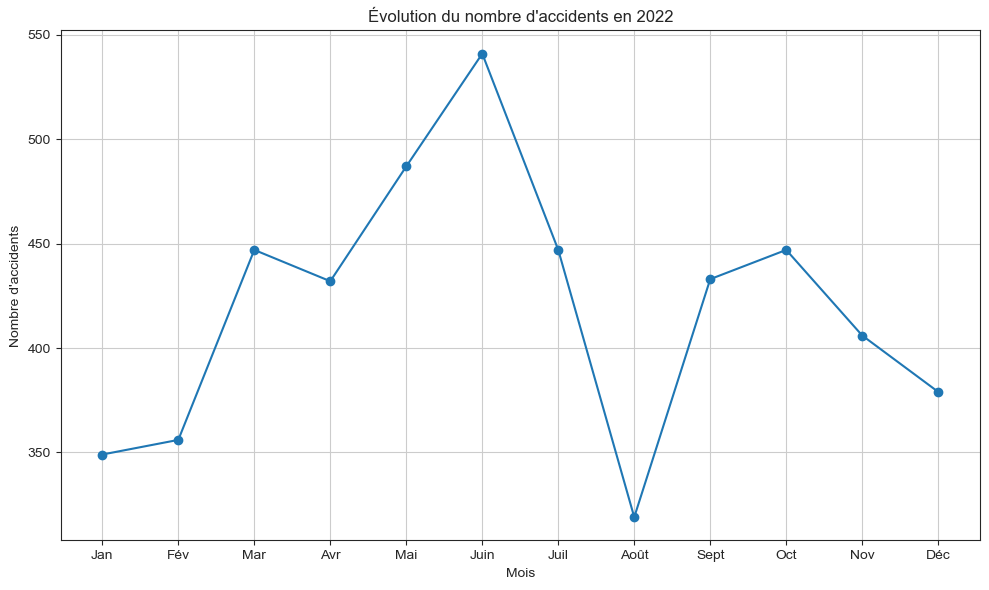

In [85]:
# Convertir la colonne de date (assumée être 'date') en format datetime
mps['Date'] = pd.to_datetime(mps['Date'], errors='coerce')

# Filtrer les données pour l'année 2022
accidents_2022 = mps[mps['Date'].dt.year == 2022]

# Extraire le mois de chaque accident
accidents_2022['mois'] = accidents_2022['Date'].dt.month

# Compter le nombre d'accidents par mois
accidents_per_month = accidents_2022.groupby('mois').size()

# Visualisation
accidents_per_month.plot(kind='line', marker='o', figsize=(10, 6), title="Évolution du nombre d'accidents en 2022")
mp.ylabel("Nombre d'accidents")
mp.xlabel("Mois")
mp.xticks(ticks=range(1, 13), labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sept", "Oct", "Nov", "Déc"])
mp.grid(True)
mp.tight_layout()
mp.show()


#### Analyse

Le graphique montre une évolution mensuelle du nombre d’accidents sur l’année 2022, avec des fluctuations significatives selon les périodes de l’année.

Un pic important se fait en juin (plus de 550 accidents), probablement lié à une augmentation des déplacements pendant la période estivale, notamment avec l’arrivée des beaux jours, la hausse des mobilités douces (vélos, trottinettes) et une plus grande activité touristique.
Une chute est marquée en août, où les déplacements diminuent traditionnellement en raison des congés d’été, réduisant le trafic urbain.
Une reprise nette se voit en septembre, avec la rentrée scolaire et professionnelle, suivie d’une diminution progressive vers la fin de l’année.

Les mois d’hiver (janvier, février, décembre) affichent un nombre d’accidents relativement faible, ce qui peut être attribué à une réduction des déplacements non essentiels et des mobilités douces en raison des conditions climatiques.

Cette saisonnalité, déjà observée dans les données de Rennes en 3.1, illustre un schéma commun aux zones urbaines denses : des périodes d’activité accrue (printemps, rentrée) et des baisses liées à des facteurs climatiques ou sociaux (hiver, vacances).
Le pic de juin pourrait aussi être lié à l’exposition accrue des usagers vulnérables (cyclistes, piétons), comme analysé dans notre analyse de l’âge et de la gravité des accidents.

Cette analyse met en évidence la nécessité d’adapter les politiques de prévention routière à la saisonnalité :
Des campagnes ciblées et des mesures renforcées en mai-juin et en septembre, périodes critiques.

#### Transition

Les tendances observées à Paris en 2022 offrent une base de comparaison intéressante avec Rennes. La prochaine section permettra d’identifier les similitudes et différences entre ces deux villes, afin d’affiner les approches spécifiques à chaque contexte.

### 3.3) Comparaison de l'évolution temporelle de Paris et Rennes

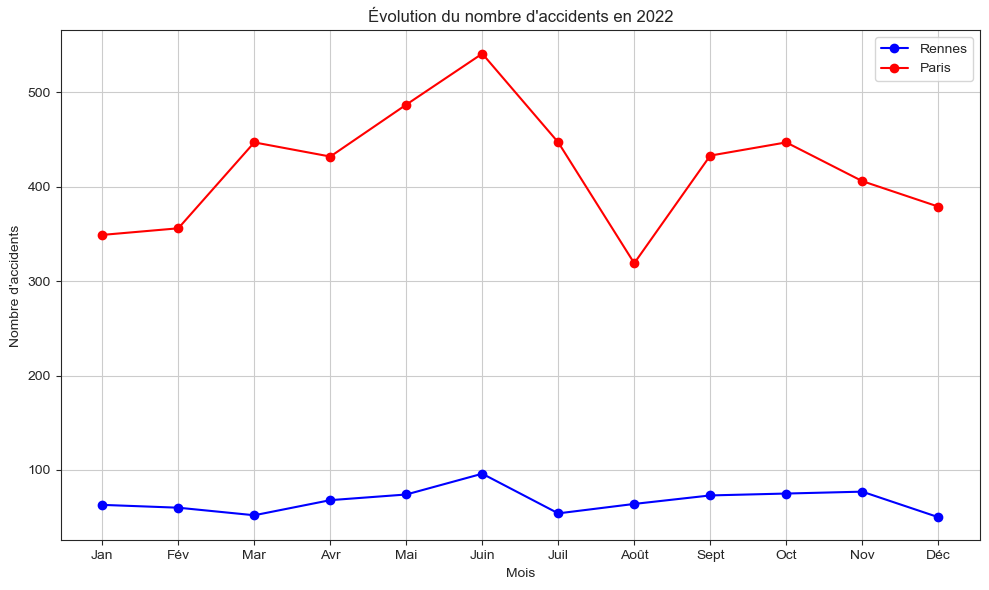

In [91]:
# Visualisation
mp.figure(figsize=(10, 6))
mp.plot(accidents_per_month1, marker='o', label='Rennes', color='blue')
mp.plot(accidents_per_month, marker='o', label='Paris', color='red')
mp.title("Évolution du nombre d'accidents en 2022")
mp.ylabel("Nombre d'accidents")
mp.xlabel("Mois")
mp.xticks(ticks=range(1, 13), labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sept", "Oct", "Nov", "Déc"])
mp.legend()
mp.grid(True)
mp.tight_layout()
mp.show()


#### Analyse

Le graphique compare l’évolution mensuelle du nombre d’accidents à Paris (courbe rouge) et Rennes (courbe bleue) pour l’année 2022.

Paris présente un nombre d’accidents bien supérieur à Rennes, avec une moyenne mensuelle autour de 400 à 500 accidents, contre seulement 50 à 100 accidents à Rennes.
Cette différence est cohérente avec la taille, la population et l’intensité du trafic beaucoup plus élevées à Paris.

Les deux villes montrent un pic en juin, suivi d’une chute notable en août, reflétant une saisonnalité liée aux vacances d’été. Cette tendance a été observée séparément dans les analyses de 3.2 pour Paris et Rennes.
Une reprise en septembre est également visible dans les deux villes, en lien avec la rentrée scolaire et professionnelle.

Les variations mensuelles à Rennes sont beaucoup plus limitées, avec une relative stabilité sur l’ensemble de l’année. Cela pourrait être lié à une dynamique de trafic moins intense et une moindre diversité des usagers (moins de touristes ou d’usages intensifs de mobilités douces).
Paris, en revanche, montre des fluctuations plus marquées, notamment en juin et août.

Les observations confirment que Paris, avec une concentration plus élevée d’accidents en milieu urbain dense (analyse en 2.2), est plus exposée aux variations saisonnières et aux périodes de forte activité.
Rennes, avec sa taille plus modeste, semble moins affectée par ces effets saisonniers, même si les pics de juin et septembre restent des points communs.

Cette comparaison met en évidence la nécessité d’approches différenciées en matière de sécurité routière :\
À Paris, des efforts ciblés sur les périodes critiques (juin, septembre) et les zones à forte densité de trafic.\
À Rennes, une prévention globale pour maintenir une stabilité déjà relativement favorable.

Ces analyses confirment l’importance d’ajuster les politiques locales en fonction des spécificités de chaque territoire urbain.

### Conclusion

Ainsi, l’analyse des accidents à Paris a permis de mettre en évidence des dynamiques propres à la capitale. Les jeunes adultes, particulièrement exposés, et les différences liées au genre soulignent des comportements de mobilité spécifiques. La répartition géographique a confirmé une forte concentration des accidents dans les zones denses, notamment dans le centre et sur les axes périphériques. Enfin, l’analyse temporelle a mis en lumière des périodes critiques, comme l’été et la rentrée, où les risques sont accrus.

Ces résultats soulignent la nécessité de stratégies ciblées pour renforcer la sécurité routière, avec un focus sur les jeunes usagers et les zones fortement fréquentées. En parallèle, les comparaisons avec Rennes permettent de contextualiser les spécificités parisiennes et offrent des pistes pour adapter les politiques locales à la réalité d’une métropole aussi dynamique et complexe que Paris.

<div style="text-align: center; padding: 10px; border: 3px solid #4B0082; border-radius: 5px; background-color: #f9f9f9;">
    <h2 style="color: #4B0082; font-family: Arial, sans-serif;">Partie 3 - Étude à l'échelle d'un pays</h2>
</div>


## Introduction

Cette dernière partie élargit l’analyse à une échelle nationale pour mieux comprendre les dynamiques des accidents en France et en Belgique. En croisant les données géographiques, temporelles, et démographiques, nous mettrons en lumière les spécificités propres à chaque pays tout en identifiant les grandes tendances.

L’étude s’articule en deux parties principales :
À l’échelle de la France et à l’échelle de la Belgique.

Cette analyse comparative permettra d’enrichir les observations locales faites à Rennes et Paris en apportant une perspective nationale.

## 3.1) Étude à l'échelle de la France

Les données françaises sont tirées de **caract-2023.csv**.

### Introduction

Dans cette section, nous analysons les accidents de la route à l’échelle nationale pour la France. Cette étude vise à identifier les zones les plus touchées grâce à une répartition géographique des accidents, puis à examiner leur évolution temporelle afin de dégager les tendances sur l’ensemble du territoire. Ces analyses permettent de mieux comprendre les dynamiques globales et d’élaborer des stratégies adaptées aux spécificités régionales.

In [103]:
fra = pd.read_csv("caract-2023.csv", sep=";")
if 'Num_Acc' in fra.columns:
    fra = fra.drop(columns=['Num_Acc'])
#if 'jour' in fra.columns:
   #fra = fra.drop(columns=['jour'])
#if 'mois' in fra.columns:
    #fra = fra.drop(columns=['mois'])
#if 'hrmn' in v.columns:
    #fra = fra.drop(columns=['hrmn'])
if 'lum' in fra.columns:
    fra = fra.drop(columns=['lum'])
#if 'Longitude' in fra.columns:
    #fra = fra.drop(columns=['Longitude'])
#if 'Latitude' in fra.columns:
    #fra = fra.drop(columns=['Latitude'])
if 'com' in fra.columns:
    fra = fra.drop(columns=['com'])
if 'agg' in fra.columns:
    fra = fra.drop(columns=['agg'])
if 'int' in fra.columns:
    fra = fra.drop(columns=['int'])
if 'atm' in fra.columns:
    fra = fra.drop(columns=['atm'])
if 'col' in fra.columns:
    fra = fra.drop(columns=['col'])
#if 'adr' in fra.columns:
    #fra = fra.drop(columns=['adr'])
if 'arrondgeo' in fra.columns:
    fra = fra.drop(columns=['arrondgeo'])
# Convertir les virgules en points dans une colonne spécifique
fra['lat'] = fra['lat'].str.replace(',', '.', regex=False)
fra['long'] = fra['long'].str.replace(',', '.', regex=False)
fra['adr'] = fra['adr'].str.lower()

def modifier_nom(val):
    if isinstance(val, str):  # Vérifie si la valeur est une chaîne
        if '(' in val and ')' in val:
            # Extraire le texte avant et apres parenth
            bef = re.match(r'^(.*?)\(', val).group(1)  # Avt
            insid = re.search(r'\((.*?)\)', val).group(1)  # Entre
            # Remplacer par le texte dans les parenthèses suivi de la partie avant la parenthèse
            return f'{insid} {bef}'
    return val
# Appliquer la fonction à la colonne 'x'
fra['adr'] = fra['adr'].apply(modifier_nom)
def arrondir_heure(val):
    if isinstance(val, str):
        # Séparer l'heure et les minutes
        heure, minutes = map(int, val.split(':'))
        
        if minutes >= 30:
            heure += 1
        return str(heure)

    return val

# Appliquer la fonction à la colonne 'x'
fra['hrmn'] = fra['hrmn'].apply(arrondir_heure)
fra['hrmn'] = fra['hrmn'].astype(float)
heure_accidents = fra['hrmn'].value_counts().sort_index()

# Afficher le tableau avec le nombre d'accidents par heure, de 7h à 6h. Je suppose qu'avant 7h c'est la nuit sur les routes (les gens rentrent 
#de osirée ou de sortie mais nocturne) et qu'à partir de 7h on est en debut de nouvelle journée : route pour travail école ou marché
index_heure = list(range(7, 24)) + list(range(0, 7))
heure_accidents = heure_accidents.reindex(index_heure)

Dans cette phase, les données issues de caract-2023.csv ont été nettoyées et restructurées. \
Les colonnes non pertinentes pour l'analyse ont été supprimées.Les coordonnées géographiques ont été uniformisées avec un format numérique cohérent (remplacement des virgules par des points). Les adresses ont été standardisées en minuscules, et leur format a été ajusté pour faciliter la lisibilité. \
Les heures d'accidents ont été arrondies à l'heure la plus proche et utilisées pour calculer la répartition des accidents par tranches horaires, en tenant compte d'une hypothèse sur les comportements routiers selon les périodes nocturnes et diurnes. \
Cette étape prépare les données à une analyse temporelle détaillée.

### 3.1.1) Répartition géographique

Commençons par la répartition graphique.

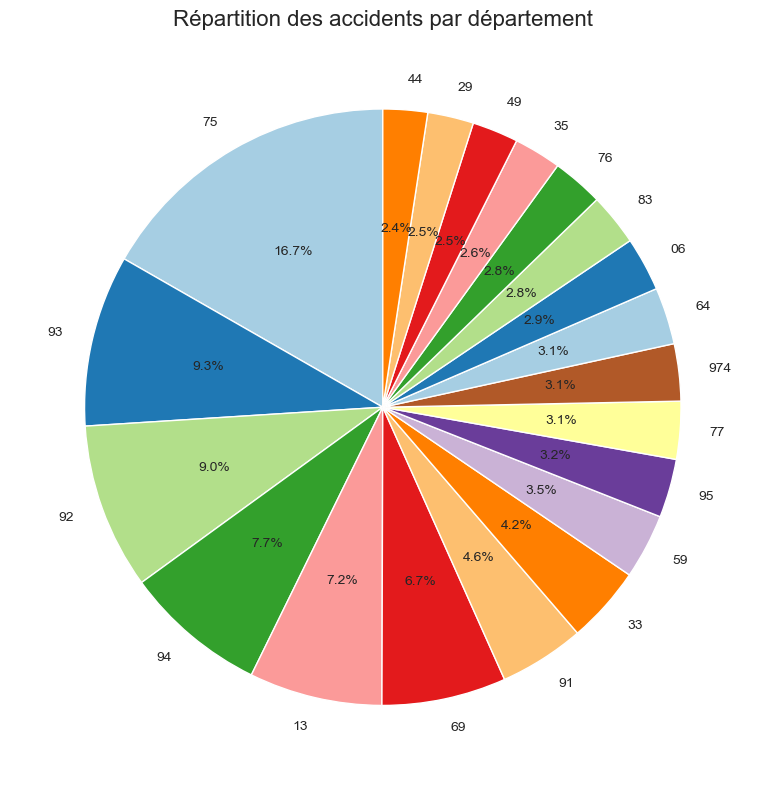

In [107]:
# Afficher le tableau avec le nombre d'accidents par deptmnt, 
dept_accidents = fra['dep'].value_counts().sort_index()
# on va selectionner les 20 plus grands 
dept20 = dept_accidents.sort_values(ascending=False).head(20)

mp.figure(figsize=(8, 8))
dept20.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=mp.cm.Paired.colors)

# Ajouter un titre
mp.title('Répartition des accidents par département', fontsize=16)

# Afficher le graphique
mp.ylabel('')  # Pour enlever l'étiquette de l'axe des y
mp.tight_layout()

# Afficher le graphique
mp.show()

#### Analyse 

Le diagramme circulaire illustre la répartition des accidents à l’échelle nationale par département. Plusieurs observations significatives peuvent être tirées de cette répartition :

Le département 75 (Paris) représente 16,7 % des accidents, soit la part la plus importante. Ce résultat est cohérent avec les analyses de la section sur Paris (partie 2), confirmant que les zones urbaines denses concentrent une majorité des accidents.
Les départements limitrophes de Paris, comme le 92 (Hauts-de-Seine) (9 %) et le 93 (Seine-Saint-Denis) (9,3 %), occupent également des parts importantes. Cela reflète la densité de population et l’intensité du trafic dans ces zones.

Les départements 13 (Bouches-du-Rhône) et 69 (Rhône), qui incluent les grandes villes de Marseille et Lyon, représentent respectivement 7,2 % et 6,7 % des accidents. Ces résultats confirment que les métropoles régionales concentrent également une part importante des accidents.

Les départements moins urbanisés ou moins densément peuplés (par exemple 29, 35, 44) affichent une contribution bien moindre au total national. Cela peut être attribué à des volumes de trafic réduits et une moindre interaction entre les usagers.

Cette répartition confirme une tendance observée dans les études de Rennes et Paris : les zones à forte densité urbaine concentrent un volume élevé d’accidents, en raison de l’intensité des interactions routières.
Les départements périphériques présentent des chiffres plus faibles.

La répartition géographique des accidents en France met en lumière des priorités claires :
Une attention particulière doit être portée aux grandes zones urbaines (Paris et métropoles régionales), où la densité de trafic entraîne un risque accru d’accidents.
Cette analyse souligne la nécessité d’une approche adaptée, combinant des mesures de sécurité renforcées en zones urbaines et des politiques préventives ciblées dans les zones rurales ayant moins d'accidents mais généralement avec des conséquences plus lourdes.

#### Transition

Après avoir identifié les zones géographiques les plus touchées par les accidents à l'échelle nationale, il est essentiel d'examiner leur évolution dans le temps afin de comprendre les tendances globales et les périodes les plus critiques.

### 3.1.2) Évolution temporelle 

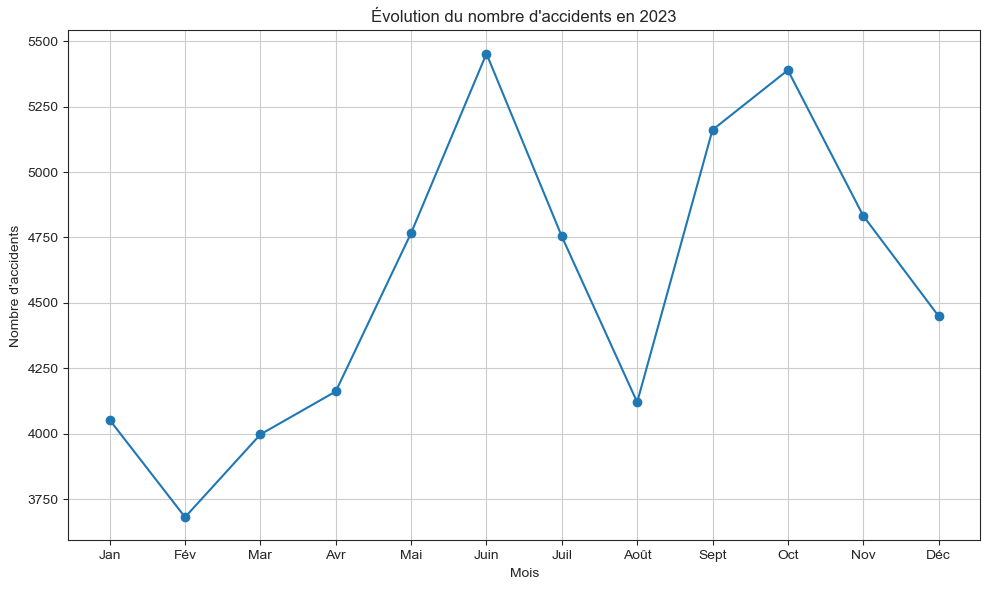

In [113]:
# Filtrer les données pour l'année 2023
accidents_2022 = fra[fra['an'] == 2023]

# Compter le nombre d'accidents par mois
accidents_per_month = accidents_2022.groupby('mois').size()

# Visualisation
accidents_per_month.plot(kind='line', marker='o', figsize=(10, 6), title="Évolution du nombre d'accidents en 2023")
mp.ylabel("Nombre d'accidents")
mp.xlabel("Mois")
mp.xticks(ticks=range(1, 13), labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sept", "Oct", "Nov", "Déc"])
mp.grid(True)
mp.tight_layout()
mp.show()

#### Analyse

Le graphique représente l’évolution du nombre total d’accidents en France mois par mois pour l’année 2023. Plusieurs tendances saisonnières et variations notables sont observées :

Un pic marqué en juin, atteignant environ 5500 accidents, ce qui coïncide avec une augmentation des déplacements liés à la saison estivale, incluant les trajets domicile-vacances et une activité accrue en mobilités douces (vélos, trottinettes, etc.).
Une baisse importante en août, reflétant la diminution des déplacements urbains pendant les vacances estivales.
Une reprise en septembre, période marquée par la rentrée scolaire et professionnelle, avec un trafic routier plus intense.

Les mois d’hiver, comme janvier et décembre, enregistrent un plus faible nombre d’accidents (environ 4000 à 4250), ce qui est généralement associé à une diminution des déplacements non essentiels et des conditions climatiques dissuasives pour certains usagers, notamment les cyclistes.

Cette évolution temporelle suit une tendance déjà observée à Paris (3.2) et à Rennes (3.3) : une forte influence des périodes de vacances et des variations saisonnières sur le trafic et les accidents.
Le pic de juin et la chute en août reflètent des comportements similaires à l’échelle nationale et dans les grandes agglomérations, renforçant l’idée que la saisonnalité est un facteur clé dans la sécurité routière.

L’analyse montre une forte corrélation entre l’intensité des déplacements et les accidents. Les données suggèrent que des campagnes de prévention ciblées en juin et une meilleure gestion du trafic pendant la rentrée pourraient réduire significativement le nombre d’accidents. Il est également crucial de maintenir des mesures de sécurité en hiver, bien que les chiffres soient plus bas, pour protéger les usagers vulnérables pendant des conditions climatiques difficiles.

### Conclusion

Ainsi, l’analyse nationale apporte une perspective globale qui complète les observations faites à Rennes et Paris. Si les grandes agglomérations concentrent une part importante des accidents, l’échelle nationale reflète l’importance des zones rurales, où la fréquence des accidents est moindre, mais leur gravité souvent plus élevée. De plus, les variations temporelles observées, marquées par des pics en été et à la rentrée, confirment des dynamiques similaires aux études locales, tout en révélant des tendances spécifiques à certaines régions.

Cette approche nationale permet d’élargir le champ des recommandations. En complément des efforts à mener dans les zones urbaines, des initiatives adaptées aux particularités rurales, comme la réduction des vitesses sur les axes secondaires ou l’amélioration des infrastructures, pourraient avoir un impact significatif. Enfin, en reliant ces observations aux analyses locales, il devient possible de mieux comprendre les enjeux systémiques de la sécurité routière et d’orienter des politiques cohérentes à toutes les échelles.

### Transition 

Après avoir exploré les dynamiques des accidents à l’échelle nationale en France, il est intéressant d’élargir l’analyse à la Belgique. Cela permettra de comparer les spécificités de ces deux pays en matière de répartition géographique, de profil des victimes et d’évolution temporelle, tout en identifiant des similitudes et différences pouvant enrichir les approches en sécurité routière.

## 3.2) Étude à l'échelle de la Belgique

Les données belges cocnernent les periodes 2021 et 202é, elles proviennent des documents : \
**TF_ACCIDENTS_VICTIMS_2022.xlsx** et **TF_ACCIDENTS_VICTIMS_2021.xlsx**.

### Introduction

L’étude portera sur deux axes principaux : la répartition géographique des accidents, ainsi que l’analyse de la corrélation entre l’âge des victimes et le nombre total d’accidents. \
Ces observations permettront de dégager des tendances nationales tout en offrant des points de comparaison avec les données françaises.

In [124]:
file_paths = [
    'TF_ACCIDENTS_VICTIMS_2021.xlsx',
    'TF_ACCIDENTS_VICTIMS_2022.xlsx'
]

for file in file_paths:
    try:
        df = pd.read_excel(file)
    except Exception as e:
        print(f"Erreur lors du chargement de {file}: {e}")

#fusion des deux fichiers
# Charger les fichiers
data_2021 = pd.read_excel('TF_ACCIDENTS_VICTIMS_2021.xlsx')
data_2022 = pd.read_excel('TF_ACCIDENTS_VICTIMS_2022.xlsx')

# Fusionner les fichiers
combined_data = pd.concat([data_2021, data_2022], ignore_index=True)

# Sauvegarder le fichier fusionné
combined_data.to_excel('Combined_Accidents_VICTIMS.xlsx', index=False)
# Supprimer des colonnes spécifiques
col_a_supprimer = ['DT_HOUR','CD_DAY_OF_WEEK','TX_DAY_OF_WEEK_DESCR_FR','TX_DAY_OF_WEEK_DESCR_NL','MS_VICT','CD_VICT_TYPE','TX_VICT_TYPE_DESCR_NL',
'CD_ROAD_USER_TYPE','TX_ROAD_USR_TYPE_DESCR_NL','CD_ROAD_TYPE','TX_ROAD_TYPE_DESCR_NL',	'CD_LIGHT_COND','TX_LIGHT_COND_DESCR_FR',
'TX_LIGHT_COND_DESCR_NL','CD_AGE_CLS','TX_AGE_CLS_DESCR_NL',	'CD_MUNTY_REFNIS','TX_MUNTY_DESCR_FR','TX_MUNTY_DESCR_NL','CD_DSTR_REFNIS',
'TX_ADM_DSTR_DESCR_NL','CD_PROV_REFNIS','TX_PROV_DESCR_NL','CD_RGN_REFNIS','TX_RGN_DESCR_NL','CD_SEX','TX_SEX_DESCR_NL']

combined_data = combined_data.drop(columns=col_a_supprimer)

# Renommer les colonnes
nom_colonnes = {
    'MS_VIC_OK': 'indemne',
    'MS_SLY_INJ': 'blessés legers',
    'MS_SERLY_INJ': 'blessés hospitalisés',
    'MS_DEAD_30_DAYS': 'blessés Tué'}

combined_data = combined_data.rename(columns=nom_colonnes)

# Sauvegarder le fichier après le renommages des colonnes
combined_data.to_excel('Filtered_Combined_Accidents_VICTIMS.xlsx', index=False)
print("Fichier avec colonnes supprimées sauvegardé sous Filtered_Combined_Accidents_VICTIMS.xlsx")

Fichier avec colonnes supprimées sauvegardé sous Filtered_Combined_Accidents_VICTIMS.xlsx


Dans cette étape, les données provenant des fichiers TF_ACCIDENTS_VICTIMS_2021.xlsx et TF_ACCIDENTS_VICTIMS_2022.xlsx ont été fusionnées pour former une dataset consolidée, facilitant l’analyse sur plusieurs années.\
Les colonnes non pertinentes ou redondantes ont été supprimées, et les colonnes clés ont été renommées pour une meilleure compréhension (MS_VIC_OK devient indemne).\
Enfin, le fichier consolidé et nettoyé a été sauvegardé pour une utilisation ultérieure dans les analyses comparatives. \
Cette étape permet une vue d’ensemble cohérente des données accidentologiques en Belgique.

### 3.2.1) Répartition géographique 

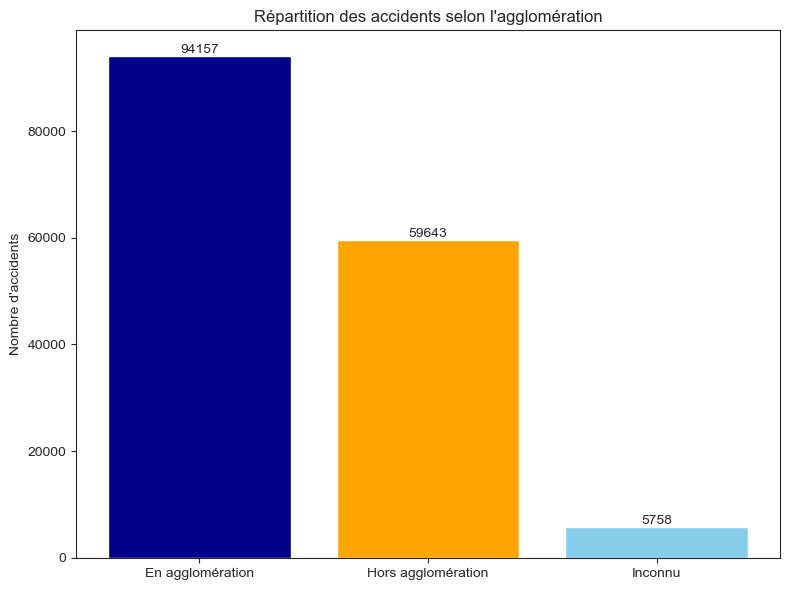

In [127]:
# Compter les occurrences pour chaque catégorie
area_counts = combined_data['TX_BUILD_UP_AREA_DESCR_FR'].value_counts()

# Préparer les données pour le graphique
labels = area_counts.index.tolist()  # Labels: 'En agglomération', 'Hors agglomération'
values = area_counts.values          # Nombre d'occurrences pour chaque catégorie

# Visualisation avec chiffres au-dessus des barres
mp.figure(figsize=(8, 6))
bars = mp.bar(labels, values, color=['darkblue', 'orange', 'skyblue'])

# Ajouter les annotations au-dessus des barres
for bar in bars:
    height = bar.get_height()
    mp.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom')

mp.title("Répartition des accidents selon l'agglomération")
mp.ylabel("Nombre d'accidents")
mp.tight_layout()
mp.show()

#### Analyse

Le graphique illustre la répartition des accidents en Belgique selon qu’ils surviennent en agglomération, hors agglomération (ou inconnue).

La majorité des accidents se produit en agglomération. Cela reflète l’importance de la densité urbaine et des interactions entre usagers, similaires à ce qui a été observé dans les analyses pour Paris et la France dans les sections précédentes.
Ces résultats s’expliquent par la concentration des habitants et des flux de mobilité (piétons, cyclistes, véhicules motorisés) dans les zones urbaines.

Les accidents hors agglomération représentent une part significative (environ 50 000 cas). Ces zones sont souvent caractérisées par des routes à vitesse élevée, ce qui peut augmenter la gravité des accidents, même si leur fréquence est moindre que dans les agglomérations.

La prédominance des accidents en agglomération est cohérente avec les observations à l’échelle de la France (3.1.1), où les grandes zones urbaines concentrent la majorité des incidents.\
Cependant, la part des accidents hors agglomération en Belgique est relativement plus élevée, ce qui pourrait indiquer un impact plus marqué des zones rurales ou des axes interurbains sur le volume total des accidents.

Ces résultats confirment que les zones urbaines en Belgique, tout comme en France, nécessitent une attention particulière en matière de sécurité routière. Néanmoins, les zones hors agglomération, en raison de leur part significative et du risque accru de gravité, justifient également des efforts spécifiques, notamment pour réduire la vitesse et améliorer les infrastructures. 

#### Transition

Après avoir identifié les zones géographiques les plus touchées par les accidents en Belgique, il est interessant de se pencher sur les caractéristiques des victimes, notamment en analysant la corrélation entre leur âge et le nombre total d’accidents, afin de mieux comprendre les profils les plus exposés

### 3.2.2)  Corrélation entre l'âge et le Nombre Total d'Accidents

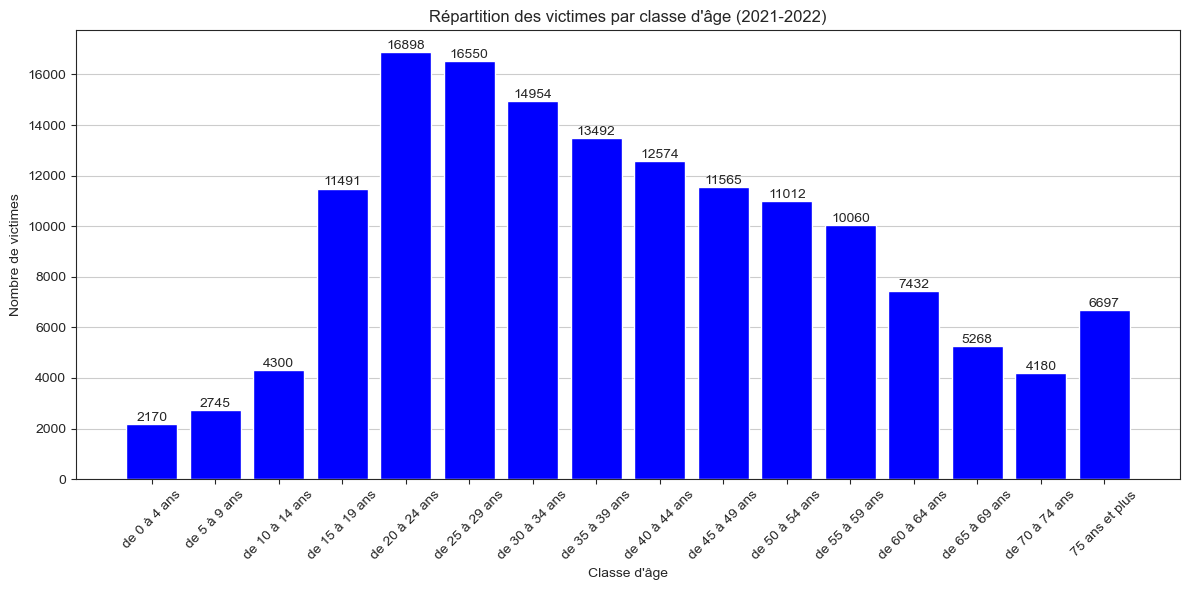

In [133]:
# Vérifier que la colonne "TX_AGE_CLS_DESCR_FR" existe
if 'TX_AGE_CLS_DESCR_FR' in combined_data.columns:
    # Nettoyer les données pour supprimer d'éventuels espaces supplémentaires
    combined_data['TX_AGE_CLS_DESCR_FR'] = combined_data['TX_AGE_CLS_DESCR_FR'].str.strip()

    # Comptabiliser le nombre de victimes par classe d'âge
    age_class_counts = combined_data['TX_AGE_CLS_DESCR_FR'].value_counts()

    # Ordre personnalisé des classes d'âge
    custom_order = [
        "de 0 à 4 ans", "de 5 à 9 ans", "de 10 à 14 ans", "de 15 à 19 ans", 
        "de 20 à 24 ans", "de 25 à 29 ans", "de 30 à 34 ans", "de 35 à 39 ans", 
        "de 40 à 44 ans", "de 45 à 49 ans", "de 50 à 54 ans", "de 55 à 59 ans", 
        "de 60 à 64 ans", "de 65 à 69 ans", "de 70 à 74 ans", "75 ans et plus"
    ]

    # Réorganiser les données selon l'ordre personnalisé
    age_class_counts = age_class_counts.reindex(custom_order, fill_value=0)

    # Préparer les données pour le diagramme à bâtons
    labels = age_class_counts.index.tolist()  # Classes d'âge
    values = age_class_counts.values          # Nombre de victimes pour chaque classe

    # Créer un diagramme à bâtons avec annotations
    mp.figure(figsize=(12, 6))
    bars = mp.bar(labels, values, color='blue')

    # Ajouter les annotations au-dessus des barres
    for bar in bars:
        height = bar.get_height()
        mp.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom')

    mp.title("Répartition des victimes par classe d'âge (2021-2022)")
    mp.xlabel("Classe d'âge")
    mp.ylabel("Nombre de victimes")
    mp.xticks(rotation=45, fontsize=10)  # Rotation des labels pour plus de lisibilité
    mp.grid(axis='y')  # Ajouter une grille horizontale pour améliorer la lisibilité
    mp.tight_layout()

    # Afficher le diagramme
    mp.show()
else:
    print("La colonne 'TX_AGE_CLS_DESCR_FR' n'existe pas dans les données. Vérifiez vos données.")

#### Analyse

Le graphique met en évidence la répartition du nombre total de victimes d’accidents en Belgique selon les différentes classes d’âge.

Les classes d’âge 15-19 ans, 20-24 ans, et 25-29 ans présentent le plus grand nombre de victimes, avec des sommets proches ou supérieurs à 16 000 cas.
Cela peut être attribué à une exposition accrue, ces tranches d’âge regroupant des jeunes conducteurs débutants, des utilisateurs fréquents de deux-roues (motorisés ou non), et des déplacements réguliers pour des activités professionnelles, scolaires ou sociales.

À partir de 30 ans, on observe une diminution progressive du nombre de victimes, tout en restant significatif dans les tranches 30-44 ans.
Les chiffres deviennent plus faibles après 50 ans, avec une baisse notable au-delà de 60 ans, reflétant probablement une réduction de la mobilité.

Les jeunes enfants (0-4 ans) et les personnes âgées de 70 ans et plus ont un nombre relativement faible de victimes. Cependant, pour les personnes âgées, leur vulnérabilité physique pourrait entraîner une gravité accrue en cas d’accident, comme vu dans d’autres analyses.

Ces observations sont cohérentes avec celles faites à l’échelle de Paris (1 - Corrélation âge et gravité) et de Rennes (1.2 - Conséquences par type d’usager), où les jeunes adultes étaient également identifiés comme la population la plus exposée.
Les similitudes dans la structure par âge entre la Belgique et la France confirment des tendances générales sur la vulnérabilité des jeunes conducteurs et leur exposition accrue.

Cette corrélation met en évidence des enjeux spécifiques :
Jeunes adultes : Ils constituent la tranche d’âge la plus exposée, nécessitant des mesures ciblées telles que des campagnes de sensibilisation, une amélioration des infrastructures et un renforcement de l’éducation routière.
Seniors et enfants : Bien qu’ils représentent un nombre moins élevé de victimes, leur fragilité impose une attention particulière pour minimiser les risques.
Cette analyse souligne l’importance d’adapter les stratégies de prévention aux comportements et besoins spécifiques de chaque tranche d’âge, afin de réduire le nombre d’accidents et leur gravité en Belgique comme en France.

### Conclusion

Ainsi, l’analyse des accidents en Belgique met en lumière une répartition marquée entre les zones urbaines, où la densité de trafic entraîne une fréquence élevée d’accidents, et les zones hors agglomération, souvent associées à des accidents plus graves. La corrélation entre l’âge et le nombre total d’accidents confirme que les jeunes adultes restent les plus exposés, un constat également observé en France.

En reliant ces observations à celles faites sur Rennes, Paris et la France, il devient évident que certaines tendances, comme la vulnérabilité des jeunes et l’influence de la densité urbaine, transcendent les frontières. \
Cependant, les spécificités belges, notamment l’importance des accidents hors agglomération, invitent à adapter les approches préventives pour tenir compte des particularités locales, tout en s’inspirant des solutions déjà mises en œuvre à l’échelle internationale.

<div style="text-align: center; padding: 10px; border: 3px solid #4B0082; border-radius: 5px; background-color: #f9f9f9;">
    <h2 style="color: #4B0082; font-family: Arial, sans-serif;">Conclusion </h2>
</div>


Cette analyse multi-échelle a permis de mettre en lumière les dynamiques des accidents de la route, des contextes locaux à une perspective nationale et internationale. À Rennes et Paris, les spécificités urbaines, telles que la densité du trafic et la concentration des usagers vulnérables, ont révélé des enjeux cruciaux pour la sécurité routière, notamment pour les motards, cyclistes et piétons. En France et en Belgique, l’analyse a élargi le champ en intégrant les particularités des zones rurales et les profils démographiques les plus touchés, comme les jeunes adultes et les seniors.

Des points communs ressortent de cette étude, comme la saisonnalité des accidents, la vulnérabilité accrue des jeunes usagers et l'impact de la densité urbaine. Cependant, chaque territoire présente aussi des particularités nécessitant des approches différenciées. Ces résultats renforcent l’importance de stratégies adaptées, combinant des infrastructures sécurisées, des campagnes de sensibilisation ciblées, et une prise en compte des réalités locales et nationales.

En conclusion, cette analyse offre une base solide pour orienter les politiques publiques et les initiatives de prévention, avec pour objectif commun de réduire le nombre et la gravité des accidents tout en rendant les déplacements plus sûrs pour tous.

<div style="text-align: center; padding: 10px; border: 3px solid #4B0082; border-radius: 5px; background-color: #f9f9f9;">
    <h2 style="color: #4B0082; font-family: Arial, sans-serif;">Bibliographie </h2>
</div>


<a id="bibliographie"></a>

## Retour à l'évolution moyenne des blessés par année et par genre

**Données :**
- **Rennes** : [Accidents corporels sur Rennes Métropole](https://www.data.gouv.fr/en/datasets/accidents-corporels-sur-rennes-metropole/)
- **Paris** : [Accidentologie à Paris](https://opendata.paris.fr/explore/dataset/accidentologie0/information/?disjunctive.com_arm_code&disjunctive.victime_type&disjunctive.gravite&disjunctive.tranche_age_victime)
- **France** : [Bases de données annuelles des accidents corporels de la circulation routière (2005-2023)](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2023/D)
- **Belgique** : [Accidents de la circulation en Belgique](https://statbel.fgov.be/fr/themes/mobilite/circulation/accidents-de-la-circulation#figures)

## Liens entre genre et exposition aux risques

- **Peu de femmes sont chauffeurs routiers** : [Analyse sur les femmes chauffeurs routiers en France](https://oppus.recherche.usherbrooke.ca/wp-content/uploads/Note-danalyse-Femmes-chauffeurs-routier-en-France-.pdf?)
- **Stéréotypes de sexe et comportements à risque dans l’espace routier** : [Étude HAL](https://hal.science/hal-02611109/file/ris00001634.pdf?)
- **Transport, mobilité, sécurité : une question de genre** : [Dossier thématique Université Gustave Eiffel](https://reflexscience.univ-gustave-eiffel.fr/fileadmin/ReflexScience/Lire/Dossiers/Dossiers_thematiques/Mobilites/genre/20080_GENRE_FR_WEB.pdf?)
  
---

Veuillez cliquer ici pour un retour à [l'analyse de l'évolution moyenne des blessés par année et par genre](#retour1)

---

## Sources des images

- **Accident de voiture (voiture)** : [Accident de voiture - Accident latéral, impact, illustration concept (vecteezy)](https://fr.vecteezy.com/art-vectoriel/4599952-accident-de-voiture-accident-lateral-impact-illustration-concept-in-cartoon-vector)

- **Route** : [Paysage d'été de dessin animé - Ville, colline, illustration de la route (vecteezy)](https://fr.vecteezy.com/art-vectoriel/681574-paysage-d-39-ete-de-dessin-anime-ville-colline-illustration-de-la-route)

- **Accident de voiture (motard)** : [Accident de voiture frappant un motard - Illustration dessin animé (freepik)](https://fr.freepik.com/vecteurs-premium/accident-voiture-accident-frappant-vecteur-illustration-dessin-anime-scene-moto_27681566.htm)

Merci de votre lecture !\
*Siham HAMMOUCH et Tom GALMICHE*